In [3]:
# Viktor Due doing some exploration of the mixture data
import pymc3 as pm
import numpy as np

In [13]:
# load the data/processed/onehot-embedding.pkl
data = np.load('../data/processed/onehot-embedding.pkl', allow_pickle=True).toarray()
data.shape

(39774, 3384)

In [27]:
# apply pca to reduce the dimensionality
from sklearn.decomposition import PCA, TruncatedSVD
pca = TruncatedSVD(n_components=2)
pca.fit(data)
data = pca.transform(data)
print(data.shape)


(39774, 2)


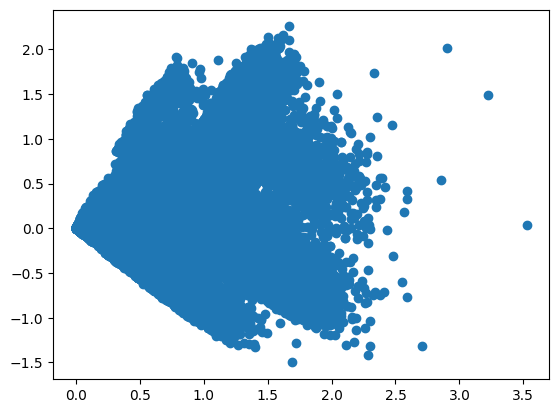

In [28]:
# plot the data
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1], )

In [18]:
# https://docs.pymc.io/en/v5.0.0/api/distributions/generated/pymc.Mixture.html#pymc.Mixture
# Mixture of 2 Poisson variables
with pm.Model() as model:
    w = pm.Dirichlet('w', a=np.array([1, 1]))  # 2 mixture weights

    lam1 = pm.Exponential('lam1', lam=1)
    lam2 = pm.Exponential('lam2', lam=1)

    # As we just need the logp, rather than add a RV to the model, we need to call `.dist()`
    # These two forms are equivalent, but the second benefits from vectorization
    components = [
        pm.Poisson.dist(mu=lam1),
        pm.Poisson.dist(mu=lam2),
    ]
    # `shape=(2,)` indicates 2 mixture components
    components = pm.Poisson.dist(mu=pm.math.stack([lam1, lam2]), shape=(2,))

    like = pm.Mixture('like', w=w, comp_dists=components)#, observed=data)

In [21]:
components

In [22]:
w

w ~ Dirichlet

In [25]:
like.draw()

AttributeError: 'FreeRV' object has no attribute 'draw'